In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import random as rnd
import warnings,datetime,os,calendar,csv

import tensorflow as tf
import pandas as pd
import seaborn as sns

from keras.models import Model,Sequential
from keras.layers import Dense,LSTM,Conv2D,Dropout,BatchNormalization,Input,Concatenate,Add,Activation,MaxPooling2D,AveragePooling2D
import keras.backend as K

from sklearn import preprocessing as pp

from sklearn.cluster import KMeans,MeanShift
from sklearn.dummy import DummyClassifier,DummyRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import BayesianRidge,Lasso,LinearRegression,SGDClassifier,SGDRegressor
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor,RadiusNeighborsClassifier,RadiusNeighborsRegressor,NearestNeighbors
from sklearn.manifold import Isomap
from sklearn.model_selection import KFold,StratifiedKFold,train_test_split
from sklearn.svm import LinearSVC,LinearSVR
from sklearn.neural_network import BernoulliRBM,MLPClassifier,MLPRegressor
from sklearn.decomposition import FactorAnalysis,KernelPCA,PCA,MiniBatchSparsePCA,FastICA
from sklearn.preprocessing import CategoricalEncoder,KBinsDiscretizer,LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler

from xgboost import XGBClassifier,XGBRegressor
import gym

import pickle,h5py,json
import urllib
from bs4 import BeautifulSoup

import pygame
from pygame.locals import *

warnings.filterwarnings('ignore')
sns.set()

C:\Users\Jan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
from sklearn.datasets import load_iris

In [3]:
data,targets = load_iris(return_X_y=True)

data = np.delete(data,np.where(targets==2),axis=0)
targets = np.delete(targets,np.where(targets==2),axis=0)

rand_idx = rnd.permutation(np.arange(0,data.shape[0]))
data = data[rand_idx,:]
targets = targets[rand_idx]

In [4]:
df = pd.DataFrame({
    'Feature 0':data[:,0],
    'Feature 1':data[:,1],
    'Feature 2':data[:,2],
    'Feature 3':data[:,3],
    'Label':targets
})

AttributeError: 'FacetGrid' object has no attribute 'hlines'

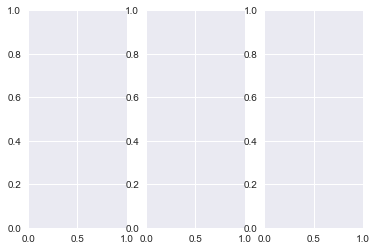

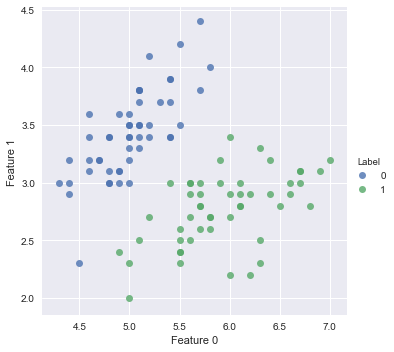

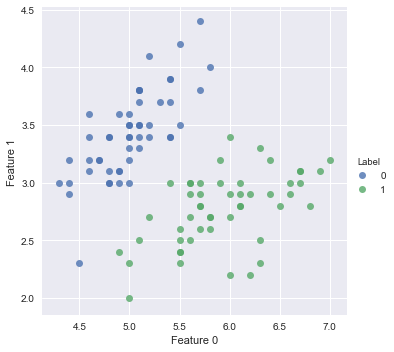

In [9]:
fig,ax = plt.subplots(ncols=3,nrows=1)

ax[0] = sns.lmplot(x='Feature 0',y='Feature 1',hue='Label',data=df,fit_reg=False)

ax[1] = sns.lmplot(x='Feature 0',y='Feature 1',hue='Label',data=df,fit_reg=False)
ax[1].hlines(y=3,xmin=4,xmax=7,colors='r',linestyles='--',label='Split in Level 0')

ax[2] = sns.lmplot(x='Feature 0',y='Feature 1',hue='Label',data=df,fit_reg=False)
ax[2].hlines(y=3,xmin=4,xmax=7,colors='r',linestyles='--',label='Split in Level 0')
ax[2].vlines(x=4.6,ymin=2,ymax=3,colors='y',linestyles='-.',label='Split 0 in Level 1')
ax[2].vlines(x=5.7,ymin=3,ymax=4.5,colors='b',linestyles='-.',label='Split 1 in Level 1')

plt.show()